# Disease Detection from Potato Leaves with CNN

**INTRODUCTION:**

Agricultural practices play a crucial role in ensuring global food security. However, the health of crops can be significantly impacted by various factors, including the presence of diseases. One such crop of immense importance is the potato, a staple food for many populations around the world. Potatoes are susceptible to diseases such as Early Blight, Late Blight, and can also exhibit a healthy state.

In this context, leveraging advanced technologies becomes imperative to efficiently monitor and manage the health of potato crops. Deep learning, particularly Convolutional Neural Networks (CNNs), has shown remarkable success in image recognition tasks. This project focuses on utilizing CNNs for the detection and classification of diseases in potato leaves, specifically targeting Early Blight, Late Blight, and Healthy states.

**Problem Definition:**

The primary objective of this deep learning project is to develop a robust model capable of accurately identifying and categorizing diseases in potato leaves. The target categories include Early Blight, Late Blight, and a Healthy state. Given a dataset of potato leaf images labeled with these categories, the model aims to learn distinctive features that differentiate between various states of potato health.

The specific challenges addressed in this project include the subtle visual differences between disease-infected leaves and healthy leaves, the ability to discern between different disease types (Early Blight and Late Blight), and ensuring the model's generalization to unseen potato leaf images.

By addressing these challenges, the proposed deep learning model aims to contribute to precision agriculture by providing an automated and efficient tool for early detection of diseases in potato crops. This, in turn, can lead to timely interventions, minimizing crop losses, and promoting sustainable agricultural practices.

potato	rakam-projesi-2-foto


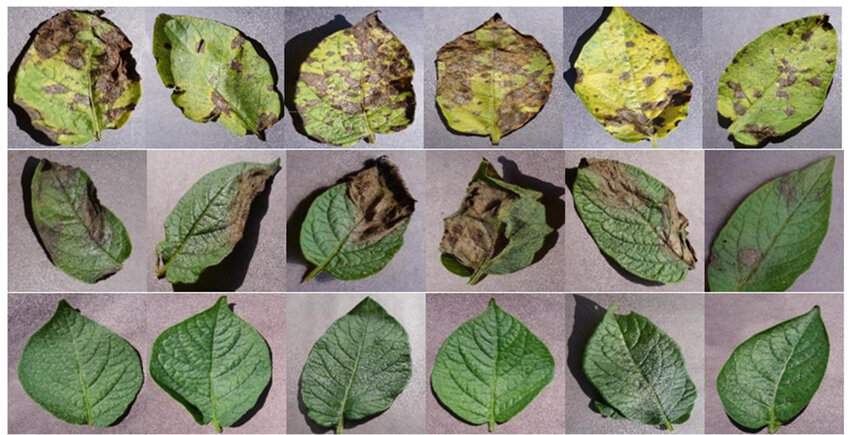

In [1]:
from IPython.display import Image
import os
!ls ../input/
Image("/kaggle/input/rakam-projesi-2-foto/Example-of-potato-leaf-diseases-Three-types-of-potato-leaves-including-early-blight.png")

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32   
CHANNELS = 3    #RGB Channels
EPOCHS = 50

In [4]:
# Specify the full path to the "PlantVillage" directory
directory_path = "/kaggle/input/potato/PlantVillage"

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"Directory '{directory_path}' does not exist.")
else:
    # Use tf.keras.preprocessing.image_dataset_from_directory
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )
    # Rest of your code for working with the dataset


Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
len(dataset)

68

Öncelikle, BATCH_SIZE (toplu boyutu) nedir?

BATCH_SIZE, modelinize aynı anda kaç örnek göstereceğinizi belirten bir parametredir. Örneğin, BATCH_SIZE = 32 olduğunda, model her eğitim adımında 32 örneği aynı anda işleyecektir. Bu, GPU veya diğer donanımların paralel işlem avantajlarından yararlanarak eğitim sürecini hızlandırabilir.

Şimdi, len(dataset) neden 68 oluyor?

tf.keras.preprocessing.image_dataset_from_directory fonksiyonu, veri setini yüklerken, genellikle eğitim ve validasyon veri setlerini ayrı ayrı oluşturur. Eğer siz bu fonksiyonu çağırırken bir validation_split parametresi belirtmezseniz, varsayılan olarak %20'lik bir kısmı validasyon veri setine ayırır.

Örneğin, diyelim ki toplamda 2152 resminiz var ve varsayılan olarak %20'lik bir kısmı validasyon için ayrıldı. Bu durumda eğitim veri seti 80% ve validasyon veri seti 20% olacaktır.

Eğitim veri seti büyüklüğü: 2152 * 0.8 = 1721
Validasyon veri seti büyüklüğü: 2152 * 0.2 = 431

BATCH_SIZE = 32 olduğunda, bu veri setlerini toplu işlemlere böldüğümüzde:

Eğitim veri setinde toplu sayısı: 1721 / 32 ≈ 54
Validasyon veri setinde toplu sayısı: 431 / 32 ≈ 14
Bu nedenle len(dataset) toplu sayısını ifade eder ve eğitim veri setindeki toplu sayısı ile validasyon veri setindeki toplu sayısının toplamını verir: 54 + 14 = 68.

In [7]:
68*32

2176

In [8]:
for image_batch, label_batch in dataset.take(1):  #When we do this (dataset.take(1)) it gives 1 batch. 1 batch include 32 images.
    print(image_batch.shape) # This indicates that you have a batch of 32 images, each with the specified height, width, and number of channels.
    print(label_batch.numpy()) # [1 0 1 0 1 0 ...] resimlerini etiketlerini/ sınıflarını temsil ediyor.
 # Yani burda 32 farklı resim temsil ediliyor aslında.   


# Etiketler vs doğru mu diye kontrol ediyorum.
# print("image batchimiz bizim :", image_batch[0])
print("etiketimiz", label_batch[0])
print(class_names[label_batch[0]])

print("etiketimiz", label_batch[1])
print(class_names[label_batch[1]])

print("etiketimiz", label_batch[3])
print(class_names[label_batch[3]])

print("etiketimiz", label_batch[5])
print(class_names[label_batch[5]])

print("etiketimiz", label_batch[8])
print(class_names[label_batch[8]])

print("etiketimiz", label_batch[31])
print(class_names[label_batch[31]])

(32, 256, 256, 3)
[1 1 0 0 1 0 0 0 0 0 1 0 0 0 2 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 2 0]
etiketimiz tf.Tensor(1, shape=(), dtype=int32)
Potato___Late_blight
etiketimiz tf.Tensor(1, shape=(), dtype=int32)
Potato___Late_blight
etiketimiz tf.Tensor(0, shape=(), dtype=int32)
Potato___Early_blight
etiketimiz tf.Tensor(0, shape=(), dtype=int32)
Potato___Early_blight
etiketimiz tf.Tensor(0, shape=(), dtype=int32)
Potato___Early_blight
etiketimiz tf.Tensor(0, shape=(), dtype=int32)
Potato___Early_blight





**Tek bir resim seçiyorum.**

(256, 256, 3)


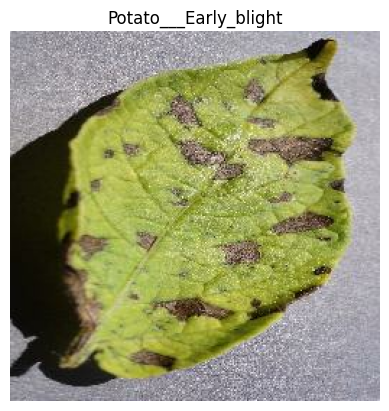

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8")) #imshow expects 3d array. I mean (256, 256, 3) (image_batch)
    print(image_batch[0].shape)
    plt.title(class_names[label_batch[0]]) # display label "What image is that?" class_names[0] yapınca "early_blight"i alıyor. Yani sınıf adını.
    plt.axis("off")
    
# astype("uint8") ifadesi, görüntü piksel değerlerini 8-bitlik işaretsiz tamsayıya (uint8) dönüştürmek için kullanılmaktadır.
# Float olduğu için 8- bitlik piksel değerlerine çevirdik.  


Tensor, çok boyutlu sayısal veriyi temsil eden bir veri yapısıdır ve derin öğrenme kütüphaneleri (örneğin, TensorFlow, PyTorch) üzerinde yaygın olarak kullanılır. NumPy ise Python'da sayısal hesaplamaları kolaylaştıran bir kütüphanedir. Tensor'ları NumPy dizilerine çevirmek, matematiksel işlemleri veya veri manipülasyonunu daha rahat gerçekleştirmek için yaygın bir uygulamadır. numpy() fonksiyonu, TensorFlow tensor'larını NumPy dizilerine dönüştürmek için kullanılır.

**Birden çok resim seçiyorum.**

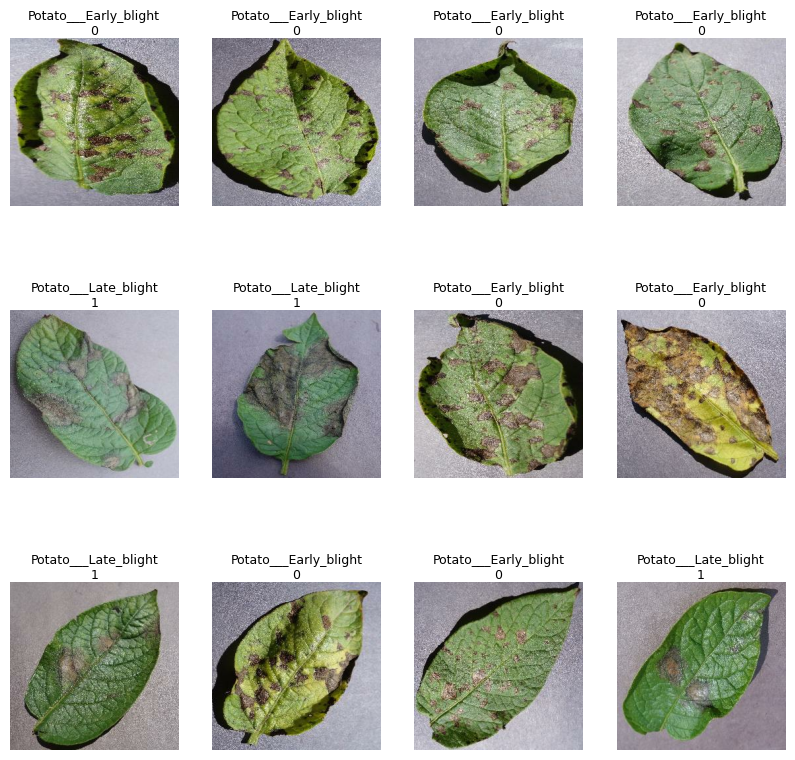

In [10]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))     
        combined_title = f"{class_names[labels_batch[i]]}\n{labels_batch[i]}"
        plt.title(combined_title, fontsize=9, pad=2)
        plt.axis("off")

**Split Data Set**

In [11]:
len(dataset)

68

In [12]:
# 80% ==> training
# 20% ==> 10% validation,10% test

Validation set will be used during the training process. When we run each epoch, after each epoch we do validation on this 10 precent. We'll run 50 epoch. Once we're done through 50 epochs, once we have final model then we use 10% test data set.This will measure accuracy of our model. Test performanca of our model.

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)      #We'll take first 54 samples/batches
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)  #It means we skipping first 54 and getting remeaning 54. In slicing arr[54:]
len(test_ds)

14

In [16]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
#And actual test_dataset
test_ds = test_ds.skip(6)
len(test_ds)

8

We split our data set into validation, test and train data set.Now we'll wrap all of them in 1 function:

In [19]:
def  get_dataset_partitions_tf(ds, train_split = 0.8, val_split =0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [20]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


**cache():**

Veri setini önbelleğe alarak, tekrarlı epoch'lar boyunca veriyi tekrar diskten okuma ihtiyacını azaltır, bu da eğitim sürecini hızlandırabilir.


**shuffle(1000):**

Veri setini karıştırarak, modelin her epoch'ta aynı sırayla eğitilmemesini sağlar ve genel model performansını artırır.


**prefetch(buffer_size=tf.data.AUTOTUNE):**

Veri setinden gelecek verileri önceden yükleyerek, modelin eğitim sırasında veri setinden veri çekme sürecini hızlandırır ve GPU kullanımını daha etkili hale getirir.

**prefetch**:

If you're using GPU and CPU, if GPU is busy training prefetch will load the next set of batch from our disk and that will improve our performance.

In [21]:
# Optimizing training performance ( Training will run fast)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

It'll read image form the disk. And then for the next iteration when we need the same image it'll keep that image in memory. So this improves the performance of our pipeline.

prefecth= If we use GPU and CPU if GPU is busy training pre-patch will load the next set of batch from our disk. And it will improve the performance.

## Preprocessing

**When we do image processing first step is SCALE**


Image's numpy array is beteen 0 to 255. Is's an RGB scale. We want to divide that by 255 so that we'll get number between 0 - 1.

Resizing = We will resize every image to 256 to 256. But our images are already 256x256. Why do we need to resize it?  

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)     #This'll just scale the image
])
# We'll supply this layer when we actually build our model. 
#In this layer we need to do one more thing in terms of preprocessing is use data augmentation.

**Data Augmentation**

In [23]:
# We'll apply random flip and rotation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

We'll use our data_augmentation and resize_and_rescale layers in our actual model. We're not completed preprocessing we just created layers for preprocessing.

## Building Model

**Input Shape :**

input_shape parametresi genellikle bir modelin ilk katmanında belirtilir, çünkü bu, modelin hangi türden giriş verisini beklediğini belirler. Ancak, bir kez belirlendikten sonra, sonraki katmanlarda genellikle input_shape belirtilmez ve bu değer, önceki katmanın çıkış şeklinden otomatik olarak alınır. Bu durum, modelin mimarisini daha esnek ve modüler hale getirir.

input_shape = (4, 28, 28, 3) ifadesi, bir giriş verisinin boyutlarını belirtir. Bu durumda her bir parametre şu şekilde anlam taşır:

4: Bu durumda 4, bir veri kümesindeki örneklerin sayısını ifade eder. Yani, modelin bir seferde işleyeceği örnek sayısıdır. Örneğin, bir seferde dört farklı 28x28 piksel boyutundaki görüntüyü işleyebilir.

28: Bu, bir görüntünün yüksekliğini (satır sayısı) temsil eder. Örneğin, her bir görüntü 28 piksel yüksekliğinde olacaktır.

28: Bu, bir görüntünün genişliğini (sütun sayısı) temsil eder. Her bir görüntü 28 piksel genişliğinde olacaktır.

3: Bu, bir görüntünün kanal sayısını temsil eder. RGB renk uzayında her piksel üç renk kanalını (kırmızı, yeşil ve mavi) içerir. Bu durumda, bir giriş görüntüsü üç renk kanalına sahiptir.

Bu input_shape ifadesi, modelin giriş verisinin boyutunu belirleyerek, modelin ilk katmanına hangi türden giriş beklediğini belirtir. Model, her bir örnek olarak dört farklı 28x28 piksel boyutundaki görüntüyü alacak ve bu görüntülerin her biri 3 renk kanalına sahip olacak şekilde işleyecektir.

**Pooling Kullanmazsak Ne Olur?**
Pooling, genellikle Convolutional Neural Networks (CNNs) içinde kullanılan bir katman türüdür. Pooling katmanları, özellik haritalarındaki özellikleri özetlemek ve boyutunu küçültmek amacıyla kullanılır. Eğer pooling yapmazsak, bazı olası sonuçlar şunlar olabilir:

Boyut Artışı: Convolutional katmanları genellikle özellik haritalarını büyütür ve bu durumun önüne geçmek için pooling kullanılır. Pooling, özellik haritalarındaki boyutu küçültür, böylece modelin öğrenme süreci daha etkili olabilir ve hesaplama maliyeti düşer.

Bilgi Kaybı: Pooling, özellik haritasındaki önemli özellikleri vurgular ve diğerlerini bastırarak özelliklerin özetlenmesini sağlar. Pooling kullanmamak, özelliklerin daha fazla ayrıntı içermesine yol açabilir, ancak bu, aynı zamanda modelin genel olarak daha fazla parametreyi öğrenmesini ve daha fazla veriyi işlemesini gerektirebilir.

Overfitting Riski: Eğer model çok büyük ve karmaşıksa ve veri miktarı sınırlıysa, pooling kullanmamak overfitting riskini artırabilir. Pooling, modelin daha genelleştirilmiş özellikleri öğrenmesine yardımcı olur ve aşırı uyuma karşı koruma sağlar.

Sonuç olarak, pooling, genellikle modelin performansını artıran ve hesaplama maliyetini düşüren önemli bir tekniktir. Ancak, kullanımı problem bağlamına, veri setine ve modelin karmaşıklığına bağlıdır. Her zaman pooling kullanmak zorunlu değildir ve bazı durumlarda pooling olmadan da başarılı sonuçlar alınabilir. Bu durumlar modelin ve problemin özelliklerine bağlı olarak değişir.


**tf.keras.layers.MaxPooling2D**
tf.keras.layers.MaxPooling2D TensorFlow Keras kütüphanesinde kullanılan bir Max Pooling katmanını temsil eder. Bu katman, özellik haritalarındaki maksimum değerleri çıkartarak boyutu küçültür ve özelliklerin özetlenmesine yardımcı olur. İşte bu katmanın önemli parametrelerinin açıklamaları:

pool_size=(2, 2): Bu, pooling işleminin her bir boyutta (yükseklik ve genişlik) kaç birimlik bir pencere içinde yapılacağını belirtir. Bu örnekte, 2x2 boyutunda bir pencere kullanılır.

strides=None: Bu, pooling penceresinin kaydırılma adımını belirtir. Eğer belirtilmezse, genellikle pool_size ile aynı olarak kabul edilir, yani 2x2 boyutundaki bir pencere 2 birim kaydırılır.

padding='valid': Bu, padding stratejisini belirtir. 'valid', padding kullanılmadığı anlamına gelir ve özellik haritasının boyutunu küçültür. 'same' ise padding kullanarak özellik haritasının boyutunu aynı tutmaya çalışır. Bu durumda 'valid' kullanılmış, yani padding yapılmamıştır.

data_format=None: Bu, giriş verisinin kanal sırasını belirtir. 'channels_last' (varsayılan) durumunda, veri biçimi (batch, height, width, channels) şeklinde olmalıdır. 'channels_first' durumunda, (batch, channels, height, width) şeklinde olmalıdır. Eğer belirtilmezse, TensorFlow otomatik olarak uygun formatı seçer.

**kwargs: Bu, katmanın diğer argümanlarıdır. Bu argümanlar, katmanın genel parametreleri için kullanılır.

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS) # format of our input
n_classes = 3  # Bizim 3 farklı sınıfımız var çıkışta.
model = models.Sequential([
    # Here we have set of layers
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(), 
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])
model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

Total params: 183747      Parameters, actually these are weights that we need to train. 

**Optimizing**

Gradient, bir fonksiyonun belirli bir noktadaki eğimini veya değişim oranını gösteren vektördür. Bir fonksiyonun gradienti, fonksiyonun her bir parametresinin, o parametreyle ilgili olan fonksiyonun eğimini gösteren bir vektördür. Gradient, bir noktada fonksiyonun artış hızını ve azalış hızını belirlemek için kullanılır.

Adam optimizasyon algoritması, öğrenme hızını adaptif bir şekilde ayarlayarak ve momentum kullanarak gradient ini belirli bir fonksiyonun minimum noktasına yönlendiren bir optimizasyon algoritmasıdır. İşte Adam'ın nasıl çalıştığını anlatan basit bir örnek:

Öğrenme Hızı (Learning Rate): Adam, her parametreye özgü adaptif bir öğrenme hızına sahiptir. Yani her parametre için öğrenme hızı ayrı ayrı ayarlanabilir. Bu, modelin farklı parametrelerine göre öğrenme hızını adapte ederek daha iyi bir konverjans sağlar.

Momentum: Adam, momentum kullanarak gradient ini geçmiş zamandaki gradient değerleri ile ağırlar. Bu, gradientin yönünü ve hızını belirler. Eğer gradient bir süredir aynı yönde değişiyorsa, momentum bu değişikliği hızlandırabilir. Bu, dalgalanmalara karşı direnç sağlar.

Adaptif Öğrenme Hızı: Adam, adaptif öğrenme hızı sayesinde her parametre için ayrı öğrenme hızını belirler. Eğer bir parametre geçmişte hızla değiştiyse, öğrenme hızı küçültülür. Eğer bir parametre uzun süre değişmediyse, öğrenme hızı büyütülür. Bu, daha hızlı konverjans ve daha istikrarlı bir öğrenme sağlar.

Örneğin, bir sinir ağı eğitildiğinde, her iterasyonda modelin parametreleri (ağırlıklar ve biaslar) belirli bir kayıp fonksiyonuna göre optimize edilir. Gradient descent, modelin parametrelerini bu kayıp fonksiyonunu minimize edecek şekilde günceller. Adam, bu gradient descent sürecini optimize ederek daha hızlı ve dengeli bir öğrenme sağlamaya çalışır.

In [26]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']    
)

**Train Our Network**

Batch size, her bir eğitim adımında (mini-batch'te) kullanılan örnek sayısını ifade eder. Bir epoch boyunca tüm eğitim veri seti, bu mini-batch'lerin tamamını içerecek şekilde model üzerinden geçirilir.

Eğitim veri setinizin toplam örnek sayısı 1,721 ve batch size'iniz 32 ise, bir epoch boyunca toplamda kaç adet mini-batch kullanılacağını hesaplayabiliriz:

**Toplam Mini-Batch Sayısı = Toplam Örnek sayısı / Batch Size**

**Toplam Mini-Batch Sayısı = 1,721 / 32 = 53.78**

Bu durumda, her bir epoch'ta toplam 53 mini-batch kullanılacak ve her bir mini-batch 32 örneği içerecek. Ancak, genellikle bu tür hesaplamalarda tam sayı bir sonuç beklenir. Dolayısıyla, bu durumda genellikle toplamda 54 mini-batch kullanılacaktır ve her bir mini-batch'te 32 örnek bulunacaktır.

Bir tam epoch boyunca modelin eğitildiği her bir adıma "mini-batch" denir. Her bir mini-batch, belirli bir batch size içindeki örneklerin model üzerinden geçirilerek gradyanların hesaplanması ve modelin güncellenmesini içerir.

Örneğin, eğer batch size 32 ise ve toplam 54 mini-batch varsa, her bir mini-batch'te 32 örnek bulunur. Model, her bir mini-batch'te 32 örnek üzerinde eğitilir ve gradyan inişi kullanılarak modelin parametreleri güncellenir. Bu işlem, toplam 54 mini-batch boyunca devam eder ve bu sayede bir tam epoch gerçekleşir.

Bu yaklaşım, veri setinin büyük olduğu durumlarda bellek ve hesaplama maliyetlerini azaltmak, gradyan inişini daha stokastik hale getirmek ve genelleme yeteneğini artırmak için yaygın olarak kullanılır.


Bu çıktıda "54/54" ifadesi, her bir epoch için kullanılan toplam mini-batch sayısını temsil eder. İlk sayı, şu ana kadar tamamlanan mini-batch sayısını, ikinci sayı ise toplam mini-batch sayısını ifade eder. Örneğin, "54/54" ifadesi, 54 mini-batch'in tamamlandığı ve toplamda 54 mini-batch olduğu anlamına gelir.

Bu durumda, her bir epoch'ta 54 mini-batch kullanıldı ve bu mini-batch'ler eğitim veri kümesinden örneklerle dolduruldu. Buradaki sayılar, batch_size parametresi ile belirlenen mini-batch boyutuna göre belirlenir. Eğer batch_size'iniz 32 ise, her bir mini-batch 32 örnek içerir ve bu durumda 54 mini-batch, toplamda 
54×32=1728 eğitim örneği ile eğitim yapmış olacaktır.

In [27]:
history = model.fit(
    train_ds,                 # Eğitim veri seti
    epochs= EPOCHS,           # Eğitim epok sayısı (bir epok, tüm veri setinin model tarafından bir kez geçirilmesidir)
    batch_size = BATCH_SIZE,  # Her bir eğitim adımında kullanılacak mini-batch boyutu
    verbose = 1,              # Eğitim sırasında çıktı düzeyi (1: detaylı çıktı, 0: çıktı yok)
    validation_data = val_ds  # Modelin performansını değerlendirmek için kullanılacak doğrulama veri seti     
)

Epoch 1/50
54/54 [==============================] - 14s 86ms/step - loss: 0.8963 - accuracy: 0.4959 - val_loss: 0.8694 - val_accuracy: 0.5260
Epoch 2/50
54/54 [==============================] - 3s 56ms/step - loss: 0.7457 - accuracy: 0.6343 - val_loss: 0.7799 - val_accuracy: 0.6302
Epoch 3/50
54/54 [==============================] - 3s 55ms/step - loss: 0.5710 - accuracy: 0.7459 - val_loss: 0.3394 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 3s 55ms/step - loss: 0.4069 - accuracy: 0.8304 - val_loss: 0.4982 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 3s 56ms/step - loss: 0.2790 - accuracy: 0.9062 - val_loss: 0.8069 - val_accuracy: 0.8073
Epoch 6/50
54/54 [==============================] - 3s 56ms/step - loss: 0.2343 - accuracy: 0.9115 - val_loss: 0.4964 - val_accuracy: 0.8490
Epoch 7/50
54/54 [==============================] - 3s 56ms/step - loss: 0.1740 - accuracy: 0.9375 - val_loss: 0.4175 - val_accuracy: 0.8698
Epoch 8/50
5

Before deploying model we'll test. We want figure out how well our model. Our model will see this data set first time.

In [28]:
scores = model.evaluate(test_ds)       # Outputdaki 8 len(test_ds)'den geliyor.

8/8 [==============================] - 2s 26ms/step - loss: 0.0931 - accuracy: 0.9688


History has some parameters

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history['accuracy']      #it's python list

[0.49594905972480774,
 0.6342592835426331,
 0.7459490895271301,
 0.8304398059844971,
 0.90625,
 0.9114583134651184,
 0.9375,
 0.921875,
 0.9548611044883728,
 0.9317129850387573,
 0.9670138955116272,
 0.9560185074806213,
 0.9745370149612427,
 0.9635416865348816,
 0.9606481194496155,
 0.9728009104728699,
 0.9670138955116272,
 0.9861111044883728,
 0.9866898059844971,
 0.9762731194496155,
 0.9780092835426331,
 0.9884259104728699,
 0.9791666865348816,
 0.9797453880310059,
 0.9901620149612427,
 0.9947916865348816,
 0.9832175970077515,
 0.9907407164573669,
 0.9832175970077515,
 0.9832175970077515,
 0.9872685074806213,
 0.9930555820465088,
 0.9890046119689941,
 0.9913194179534912,
 0.9826388955116272,
 0.9890046119689941,
 0.9959490895271301,
 0.9913194179534912,
 0.9913194179534912,
 0.9751157164573669,
 0.9930555820465088,
 0.9675925970077515,
 0.9739583134651184,
 0.9890046119689941,
 0.9918981194496155,
 0.9930555820465088,
 0.9930555820465088,
 0.9953703880310059,
 0.9942129850387573,
 0.

All of them are storing in history. We can plot them in a matplotlib chart.

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

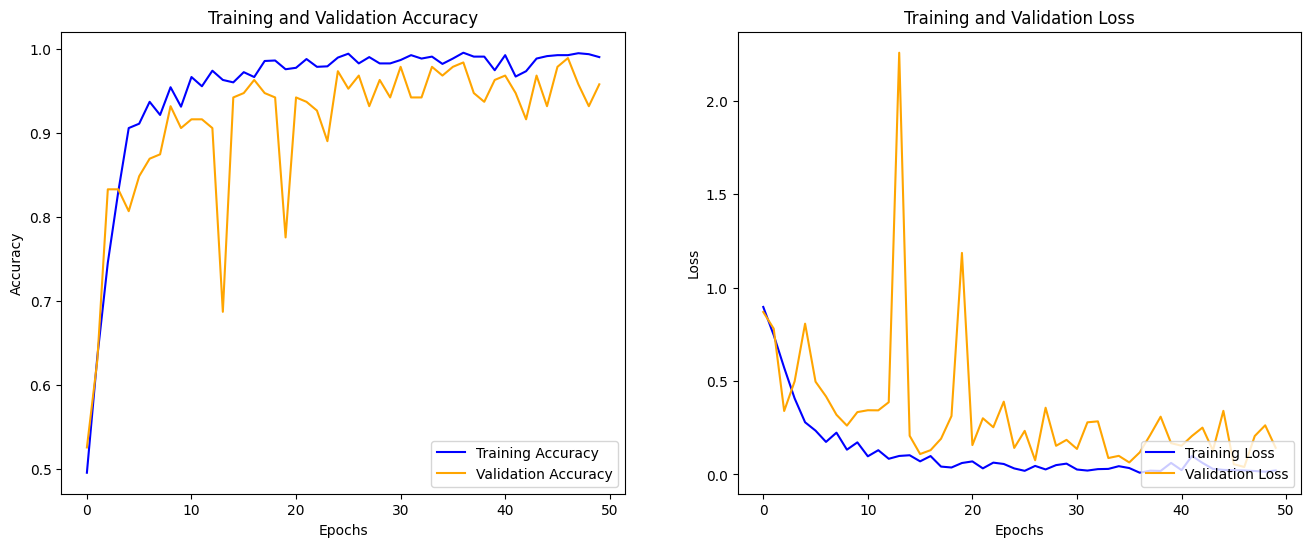

In [34]:
plt.figure(figsize=(16, 6))

# Plotting Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='blue')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='orange')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)

plt.show()

## Prediction

**take(1)**

test_ds.take(1) ifadesi, test veri kümesinden sadece bir örnek almak için kullanılır. Bu, test veri kümesindeki ilk mini-batch'tir. Yani, test_ds içindeki veri kümesinden sadece bir adım (mini-batch) alır. 

Eğer test_ds veri kümesindeki batch boyutu (batch size) 32 ise, test_ds.take(1) ifadesi, 32 örneği içeren bir mini-batch alacaktır. Bu durumda, for images_batch, labels_batch in test_ds.take(1): döngüsü, test veri kümesinden alınan bu tek mini-batch'teki 32 görüntüyü ve etiketleri içerecektir. Dolayısıyla, her bir images_batch ve labels_batch içinde 32 örnek bulunacaktır.

[[[153 151 165]
  [162 160 174]
  [158 156 170]
  ...
  [114 110 124]
  [115 111 125]
  [121 117 131]]

 [[145 143 157]
  [154 152 166]
  [152 150 164]
  ...
  [116 112 126]
  [115 111 125]
  [118 114 128]]

 [[149 147 161]
  [156 154 168]
  [154 152 166]
  ...
  [122 118 132]
  [120 116 130]
  [118 114 128]]

 ...

 [[142 138 152]
  [143 139 153]
  [139 135 149]
  ...
  [121 117 131]
  [121 117 131]
  [126 122 136]]

 [[140 136 150]
  [142 138 152]
  [137 133 147]
  ...
  [113 109 123]
  [114 110 124]
  [122 118 132]]

 [[138 134 148]
  [143 139 153]
  [142 138 152]
  ...
  [106 102 116]
  [108 104 118]
  [118 114 128]]]


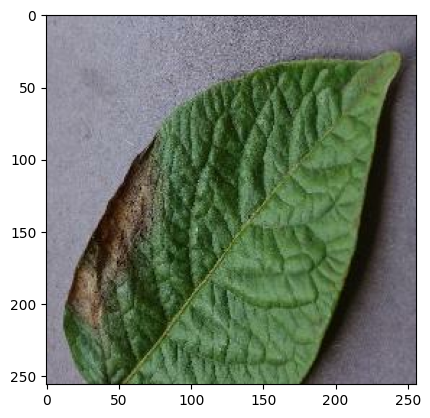

In [35]:
for images_batch, labels_batch in test_ds.take(1):         
    plt.imshow(images_batch[0].numpy().astype('uint8'))  #it is our first image
    print(images_batch[0].numpy().astype('uint8'))     #We see 3d array

np.argmax(batch_prediction[0]) ifadesindeki [0], batch içindeki birinci örneğe (görüntüye) ait tahminlerin alınmasını ifade eder. Bu durumda, batch_prediction içindeki ilk satır, yani [0], birinci görüntüye ait model tahminlerini içerir.

First image to predict
First image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 165ms/step
[4.7226904e-06 9.9999440e-01 8.7779546e-07]
Predicted label :  Potato___Late_blight


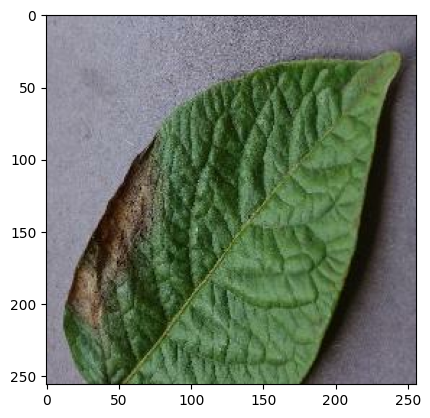

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):         
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label:", class_names[first_label])
    
    
    # We want predicted label.
    
    # Our model is ready.
    batch_prediction = model.predict(images_batch)    #This will be the prediction for 32 images.
    print(batch_prediction[0])         # Bu 3 sınıf içinde verdiğimiz resmin doğruluk oranı. Baktığımızda 9.5 ile en yakın 1. indekse ait. Buraya [0] koymadığımızda o batchdeki (32) resim için olan tüm oranları satır satır getiriyor. Yani her farklı resim için 1 satır. İlk satır ilk resim, ikinci satır ikinci resim gibi.
    #if we want to prediction for the first image we'll do this:
    print("Predicted label : ",class_names[np.argmax(batch_prediction[0])])   # argmax selected highest one in 3 classes.

First image to predict
First image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 44ms/step
[1.2863351e-06 9.9999869e-01 1.2608439e-12]
Predicted label :  Potato___Late_blight


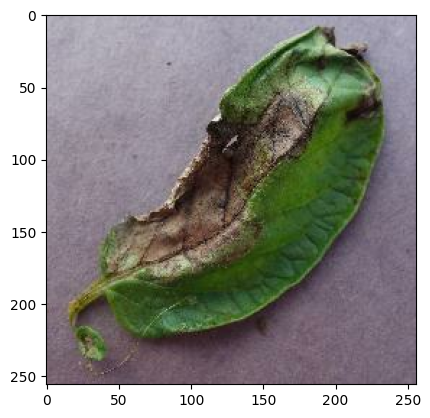

In [37]:
import numpy as np
test_ds2 = test_ds.shuffle(buffer_size=32, seed=1, reshuffle_each_iteration=False)


for images_batch, labels_batch in test_ds2.take(1):         
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label:", class_names[first_label])
   
    # Our model is ready.
    batch_prediction = model.predict(images_batch)   
    print(batch_prediction[0])         
    print("Predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [38]:
# print(batch_prediction[0]) yazdığımızda yukarıda [9.9957806e-01, 4.2188444e-04, 3.1550254e-21] bunu verdi.
np.argmax([9.9957806e-01, 4.2188444e-04, 3.1550254e-21])

0

[9.9957806e-01 4.2188444e-04 3.1550254e-21]     biggest one is actual class. And the answer is 0. Meaning it is our class.

We will write a function that is taking model and image as an input. And telling you what is the predicted class.

In [39]:
def predict(model, img):
    # 1. Görüntüyü NumPy dizisine dönüştürme
    #img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # 2. Boyutları genişleterek bir grup oluşturma (batch size = 1)
    img_array = tf.expand_dims(img_array, 0)
    
    # 3. Tahminler yapma
    predictions = model.predict(img_array)
    
    # 4. Tahmin edilen sınıf ve güvenilirlik oranını alma
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    # 5. Tahmin edilen sınıfı ve güvenilirlik oranını döndürme
    return predicted_class, confidence

32 resmin hepsinde değil sadece 9 tanesi için tahmin yapmak istiyorum.

1/1 [==============================] - 0s 393ms/step
Potato___Early_blight
1/1 [==============================] - 0s 22ms/step
Potato___Early_blight
1/1 [==============================] - 0s 28ms/step
Potato___healthy
1/1 [==============================] - 0s 20ms/step
Potato___healthy
1/1 [==============================] - 0s 20ms/step
Potato___Early_blight
1/1 [==============================] - 0s 20ms/step
Potato___Early_blight
1/1 [==============================] - 0s 19ms/step
Potato___Early_blight
1/1 [==============================] - 0s 19ms/step
Potato___Late_blight
1/1 [==============================] - 0s 20ms/step
Potato___Early_blight


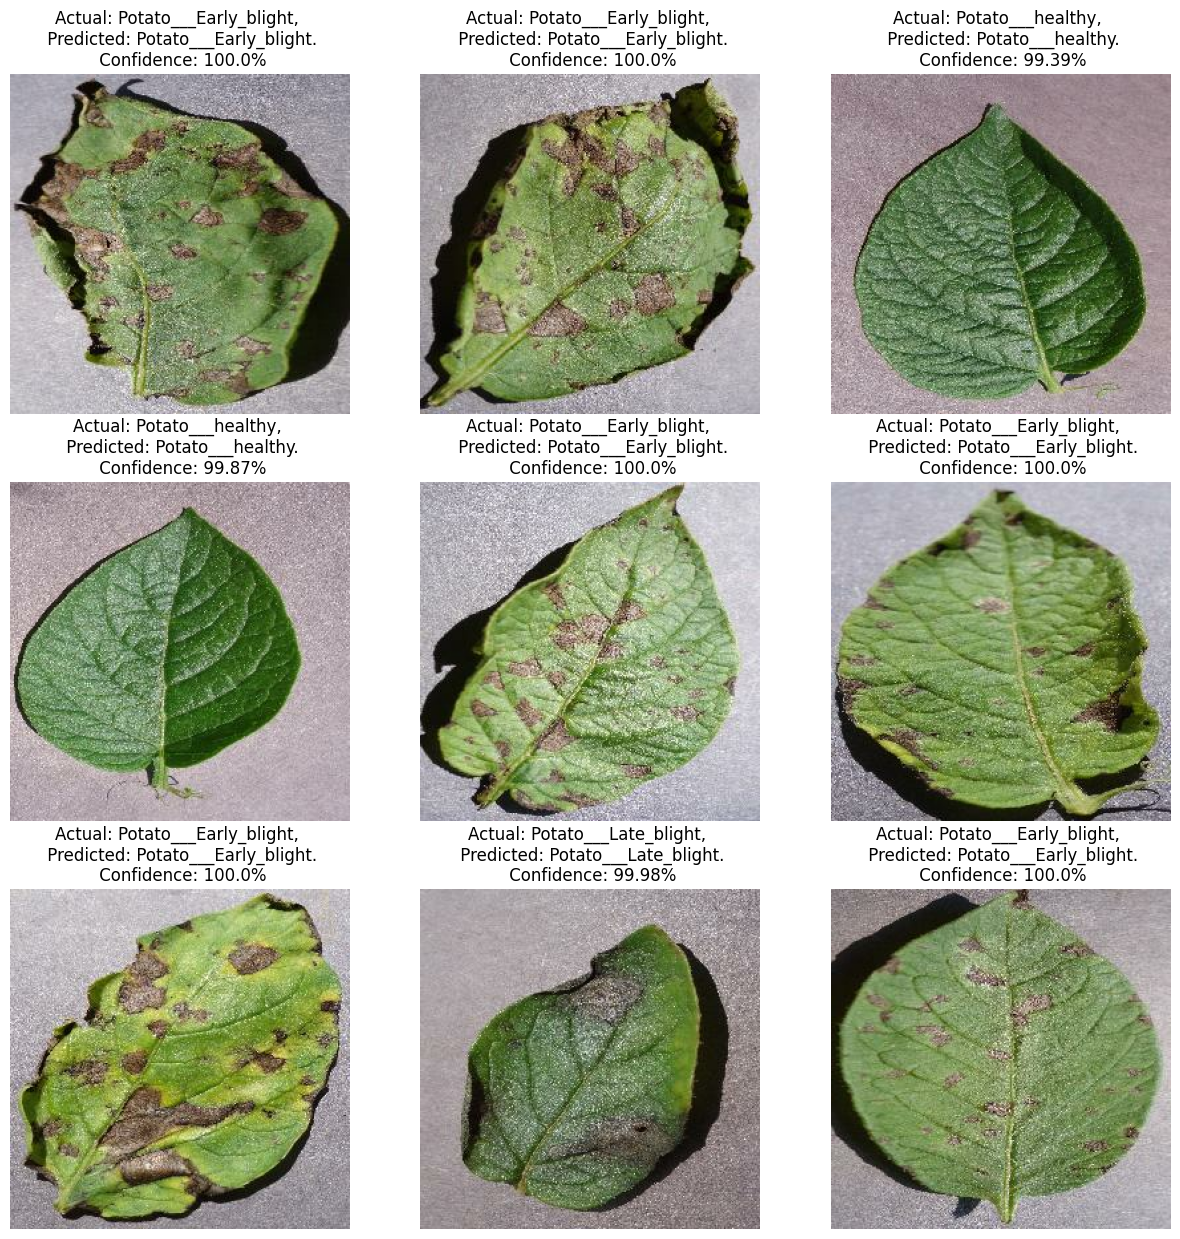

In [40]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):  
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        print(predicted_class)

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        #plt.title(f"Actual Class: {class_names[labels[i]]},\n Predicted Class: {class_names[predicted_classes[i]]}")
        plt.axis("off")

In [41]:
# Modelin çıkışını inceleme
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    print("Model Output Shape:", predictions.shape)
    print("Sample Predictions:", predictions[0])

# Sınıf adları ile tahmin edilen sınıflar arasındaki eşleşmeyi kontrol etme
predicted_classes = np.argmax(predictions, axis=1)
for i in range(min(5, len(labels))):  # İlk 5 örneği kontrol etmek için
    print(f"Actual Class: {class_names[labels[i]]}, Predicted Class: {class_names[predicted_classes[i]]}")


1/1 [==============================] - 0s 42ms/step
Model Output Shape: (32, 3)
Sample Predictions: [2.1543058e-06 6.0778121e-03 9.9392009e-01]
Actual Class: Potato___healthy, Predicted Class: Potato___healthy
Actual Class: Potato___Late_blight, Predicted Class: Potato___Late_blight
Actual Class: Potato___Late_blight, Predicted Class: Potato___Late_blight
Actual Class: Potato___Early_blight, Predicted Class: Potato___Early_blight
Actual Class: Potato___Early_blight, Predicted Class: Potato___Early_blight


In [42]:
model.save('/kaggle/working/weights.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
